In [28]:
import os

import numpy as np
import pandas as pd
from PIL import Image

import matplotlib.pyplot as plt

In [29]:
first_dir = '/opt/ml/image-classification-level1-05/output/best_output.csv'
second_dir = '/opt/ml/image-classification-level1-05/output/kh_output_2.csv'
# second_dir = './results/submission22.csv'
eval_dir = '../input/data/eval/images'

In [33]:
compare1 = pd.read_csv(first_dir)
compare2 = pd.read_csv(second_dir)
compare = pd.merge(left = compare1, right = compare2, left_on = 'ImageID', right_on = 'ImageID')
compare['match'] = compare['ans_x'] != compare['ans_y']

In [34]:
(~compare.match).sum()

6542

In [18]:
print(mask_diff, gender_diff, age_diff)

0 3 49


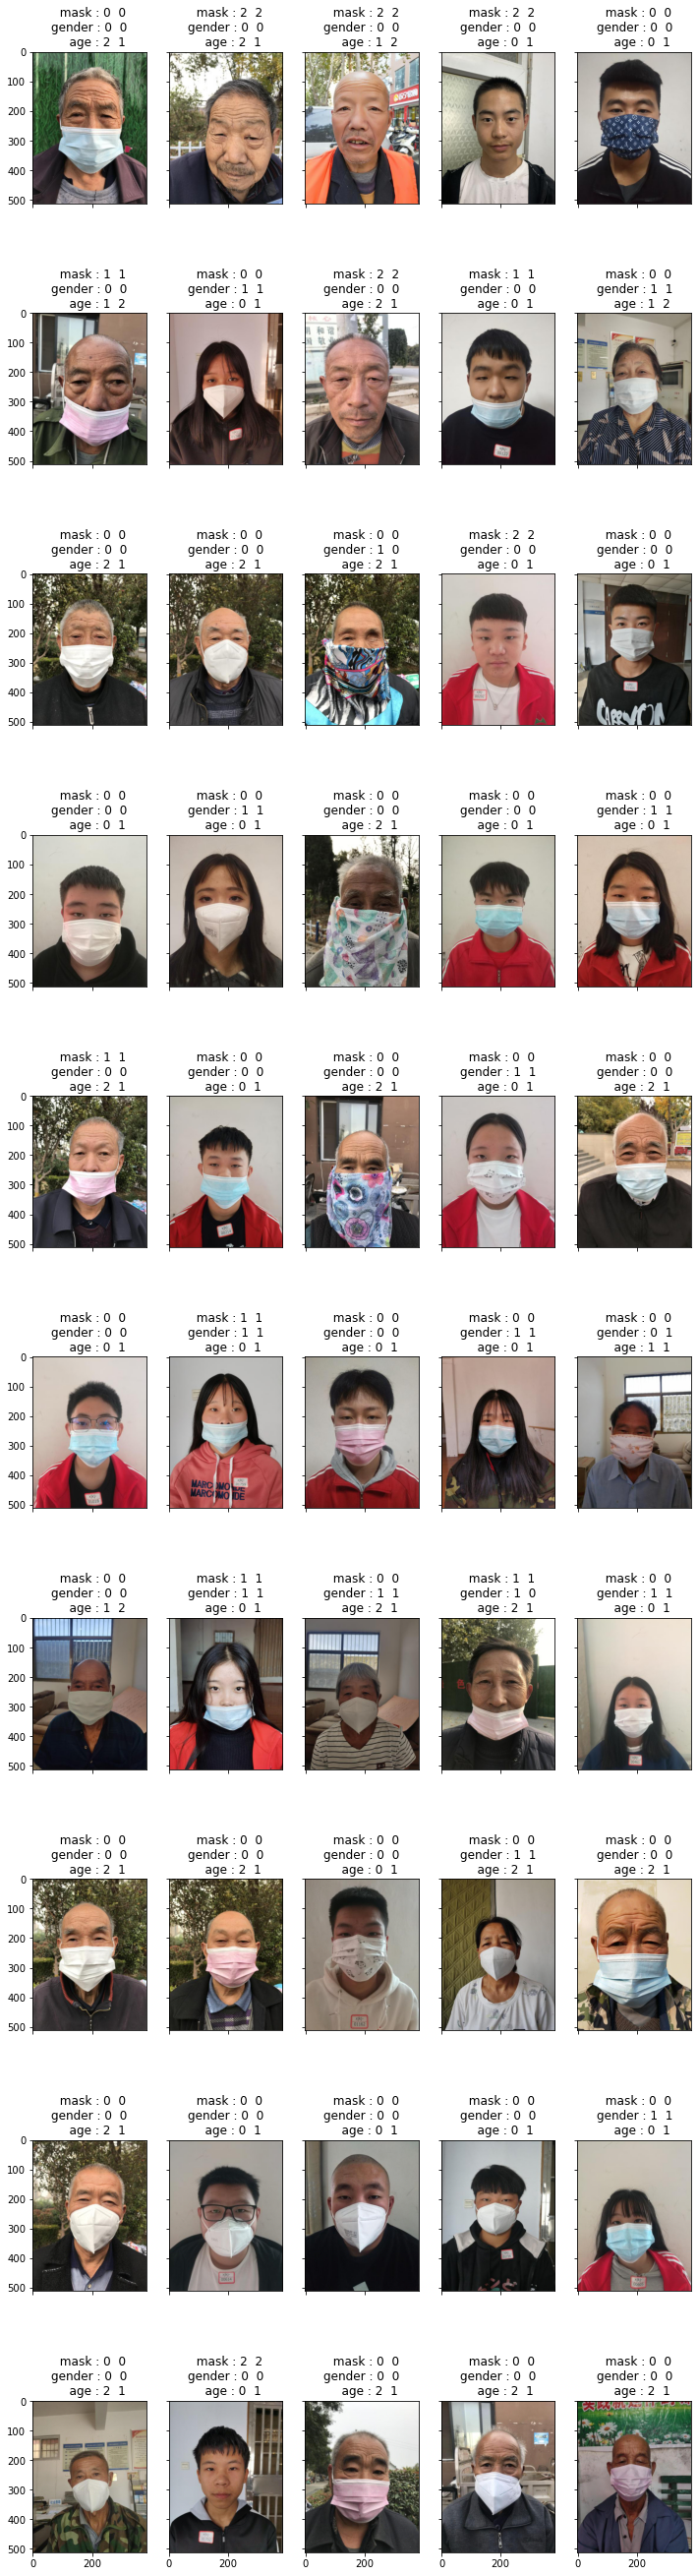

In [35]:
fig, axes = plt.subplots(10, 5, sharex=True, sharey=True, figsize=(12, 48))
axes = axes.flatten()

mask_diff = 0
gender_diff = 0
age_diff = 0
diff = 0

# cnt = 0
for idx, i in enumerate(different_dir.iloc[:]):
    image = np.array(Image.open(os.path.join(eval_dir, i)))
    new, old = compare1_result.iloc[idx], compare2_result.iloc[idx]

    diff = diff + 1 if new != old else diff
    
    mask_new, mask_old = new // 6, old // 6
    gender_new, gender_old = (new % 6) // 3, (old % 6) // 3
    age_new, age_old = (new % 6 % 3), (old % 6 % 3)

    mask_diff = mask_diff+1 if mask_new != mask_old else mask_diff
    gender_diff = gender_diff+1 if gender_new != gender_old else gender_diff
    age_diff = age_diff+1 if age_new != age_old else age_diff

    

    # if age_new != age_old:
    axes[idx].set_title(f'  mask : {mask_new}  {mask_old}\ngender : {gender_new}  {gender_old}\n    age : {age_new}  {age_old}')
    axes[idx].imshow(image)
        # cnt += 1
    if idx == 49:
        break
# print(cnt)